# **Submission Akhir: Menyelesaikan Permasalahan Institusi Pendidikan**

*   Name: Rasyid Alfiansyah
*   Email: rasyidalfiansyh@gmail.com
*   Dicoding ID: rasyid_alfiansyah







# Persiapan

## Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files

## Menyiapkan data yang akan diguankan

In [2]:
url = (
    'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/' \
    'main/students_performance/data.csv'
)

df = pd.read_csv(url, sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding

In [3]:
print(df.info())
print(df.describe())
print(df.select_dtypes(include='object').nunique())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

# Data Preparation / Preprocessing

In [4]:
df.dropna(inplace=True)
print("After dropna, shape:", df.shape)

df.drop_duplicates(inplace=True)
print("After drop_duplicates, shape:", df.shape)

# Save cleaned data for dashboard
clean_file = 'data_cleaned.csv'
df.to_csv(clean_file, index=False)

After dropna, shape: (4424, 37)
After drop_duplicates, shape: (4424, 37)


# Exploratory Data Analysis

## Correlation Heatmap

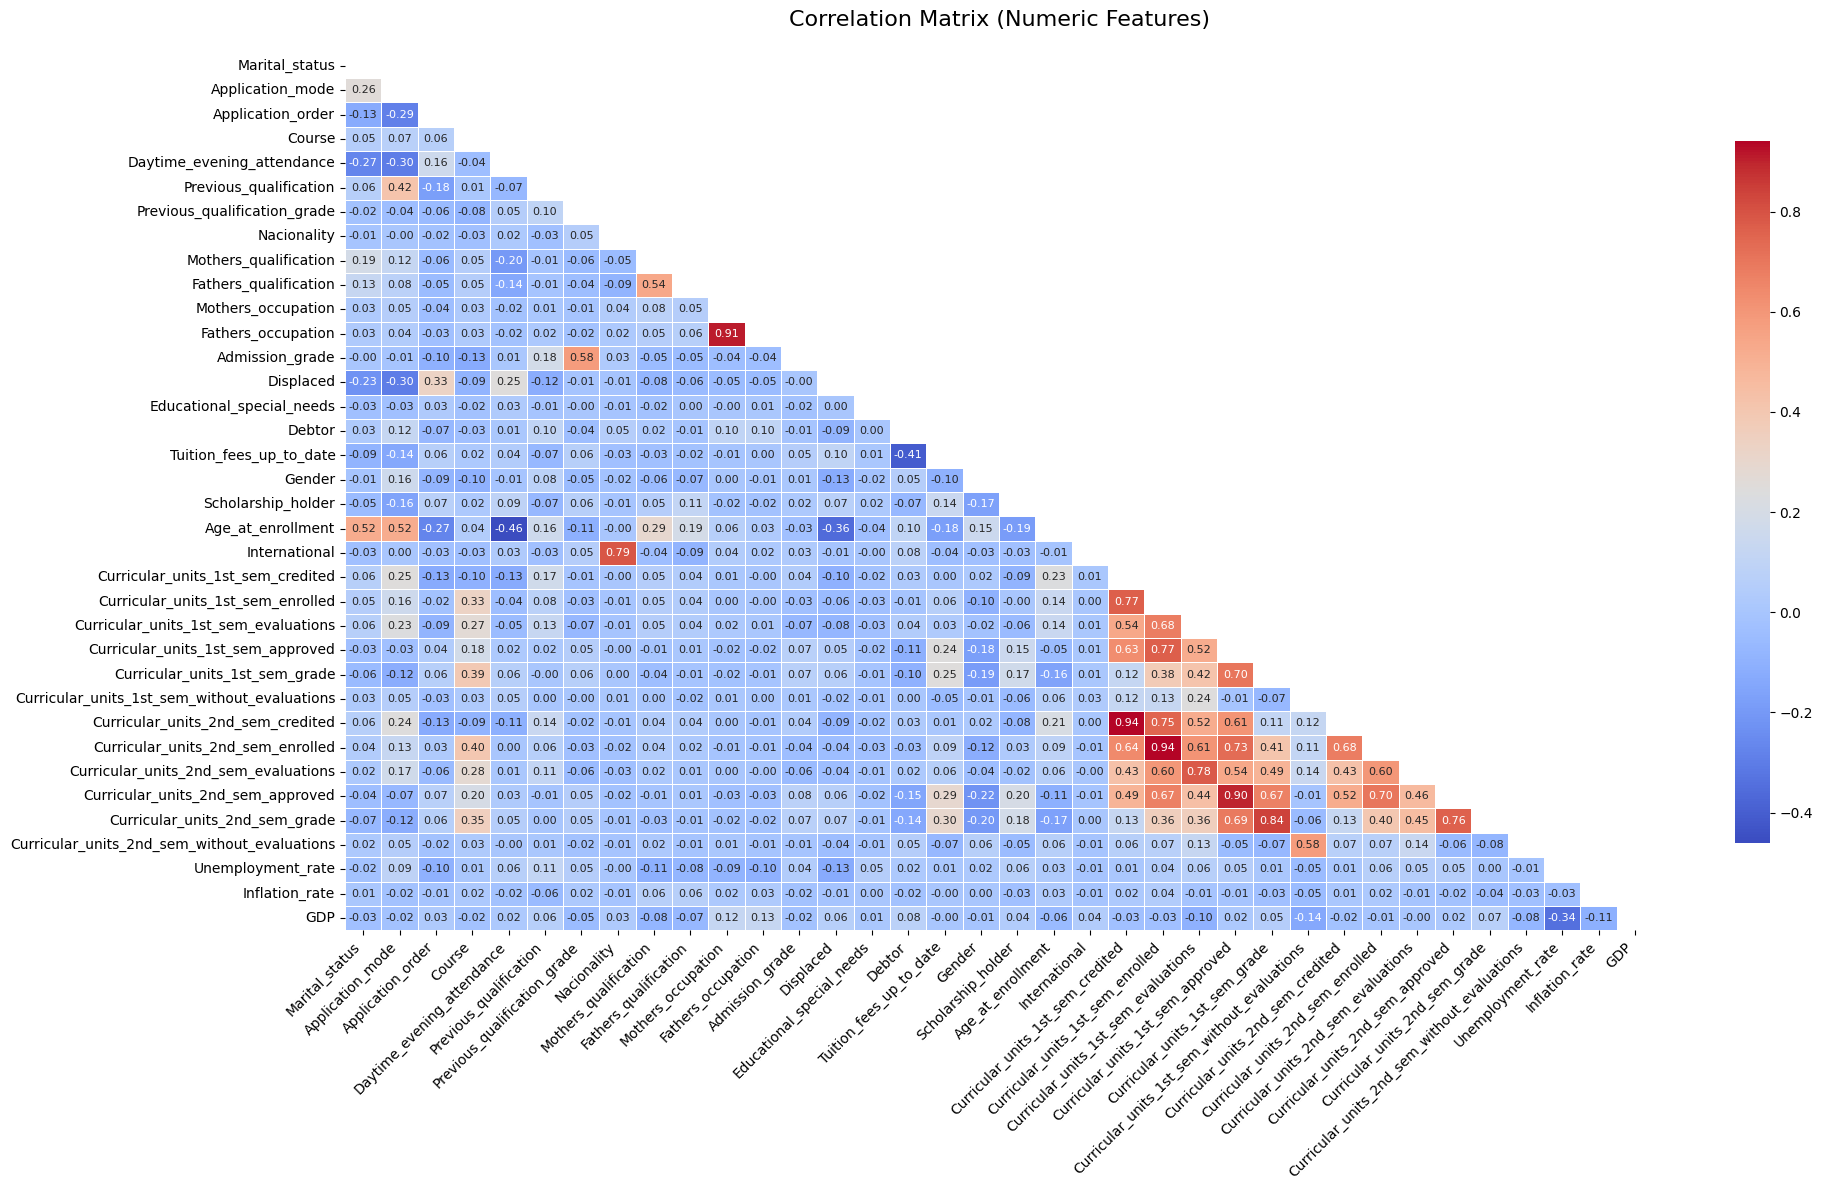

In [5]:
plt.figure(figsize=(20,12))
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={'size':8},
    cbar_kws={'shrink':0.8}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix (Numeric Features)', pad=20, size=16)
plt.tight_layout()
plt.show()

## Distribution of Numerical Features

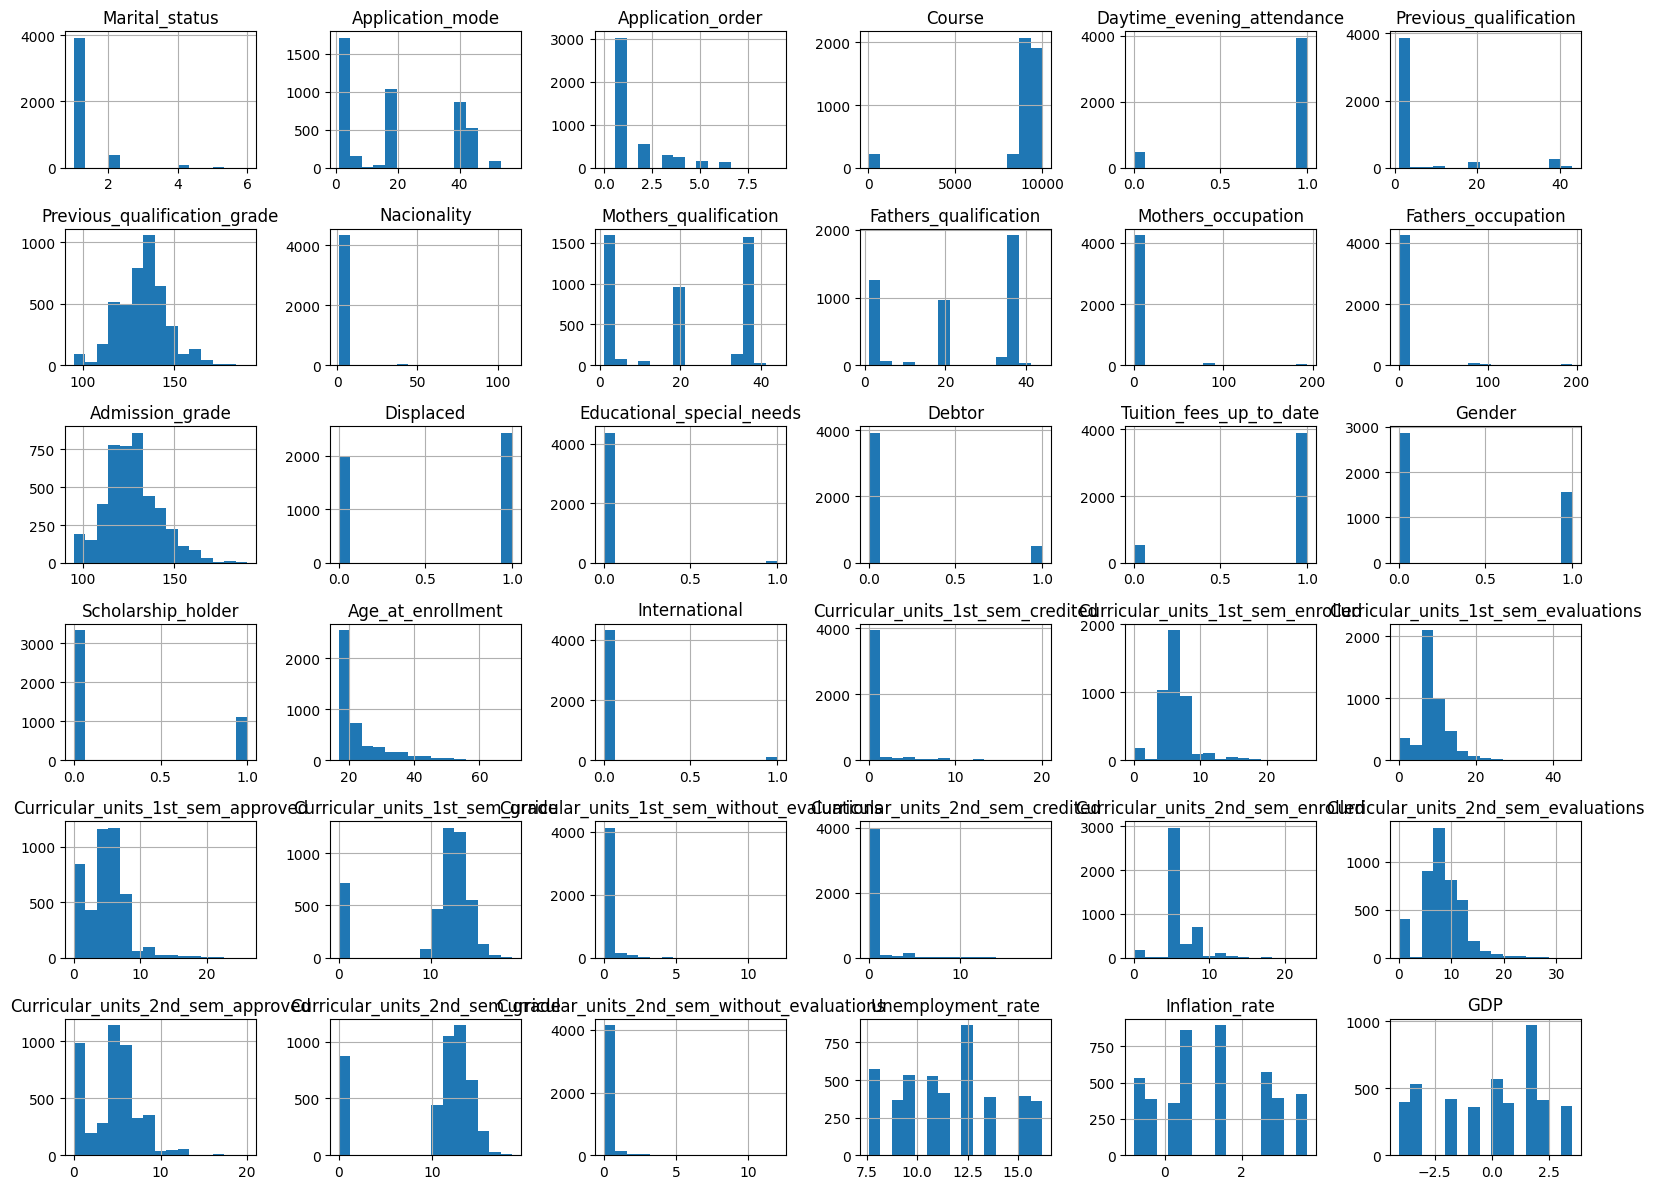

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=15, figsize=(16,12))
plt.tight_layout()
plt.show()

## Status Balance

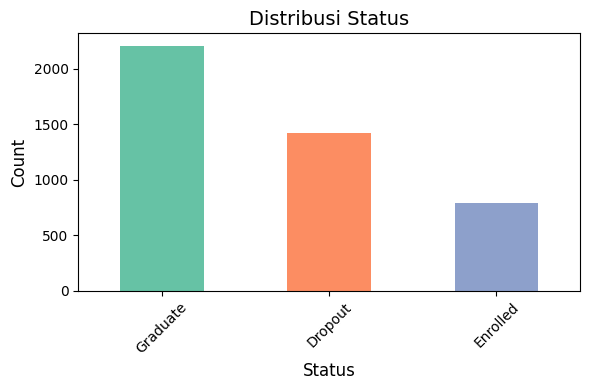

In [7]:
# Hitung frekuensi
counts = df['Status'].value_counts()

# Buat palette sebanyak kategori
colors = sns.color_palette("Set2", counts.size)

# Plot pakai pandas
ax = counts.plot.bar(figsize=(6,4), color=colors)

# Styling
ax.set_title('Distribusi Status', size=14)
ax.set_xlabel('Status', size=12)
ax.set_ylabel('Count', size=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Data Transformation for Modeling

## Make Copy

In [8]:
mod_df = df.copy()

## Encode Status

In [9]:
le_status = LabelEncoder()
mod_df['Status_enc'] = le_status.fit_transform(mod_df['Status'])

## Encode Categorical

In [10]:
le = LabelEncoder()
cat_cols = mod_df.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    mod_df[col] = le.fit_transform(mod_df[col])

## Drop Status Columns

In [11]:
mod_df.drop(['Status'], axis=1, inplace=True)

## Scale Numerical

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Hilangkan 'Status_enc' dari scaling
num_cols = [c for c in num_cols if c != 'Status_enc']

scaler = MinMaxScaler()
mod_df[num_cols] = scaler.fit_transform(mod_df[num_cols])

## Train/Test Split

In [13]:
X = mod_df.drop('Status_enc', axis=1)
y = mod_df['Status_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print('Shapes:', X_train.shape, X_test.shape)
print('Target distribution (train):')
print(y_train.value_counts(normalize=True))

Shapes: (3539, 36) (885, 36)
Target distribution (train):
Status_enc
2    0.499294
0    0.321277
1    0.179429
Name: proportion, dtype: float64


# Modeling

In [14]:
models = {
    'Logistic': LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42),
    'SVM': SVC(class_weight='balanced', max_iter=10000, probability=True, random_state=42),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB()
}

metrics = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds, average='weighted'),
        'Recall': recall_score(y_test, preds, average='weighted'),
        'F1-score': f1_score(y_test, preds, average='weighted')
    }

metrics_df = pd.DataFrame(metrics).T.round(3)
print(metrics_df)

                  Accuracy  Precision  Recall  F1-score
Logistic             0.714      0.771   0.714     0.732
SVM                  0.703      0.759   0.703     0.719
DecisionTree         0.656      0.670   0.656     0.662
RandomForest         0.779      0.765   0.779     0.763
GradientBoosting     0.759      0.748   0.759     0.750
KNN                  0.645      0.635   0.645     0.639
NaiveBayes           0.659      0.633   0.659     0.642


In [15]:
# Ambil model yang sudah ter-fit dari loop sebelumnya
best = models['GradientBoosting']

# Evaluation


=== Training ===
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1137
           1       0.73      0.56      0.64       635
           2       0.84      0.95      0.90      1767

    accuracy                           0.84      3539
   macro avg       0.82      0.78      0.80      3539
weighted avg       0.84      0.84      0.84      3539



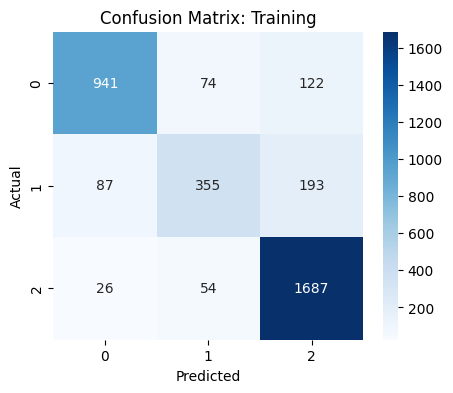


=== Testing ===
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       284
           1       0.53      0.41      0.46       159
           2       0.80      0.90      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



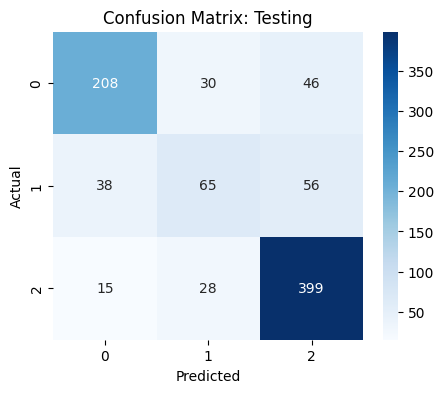

In [16]:
def eval_report(y_true, y_pred, label):
    """
    Cetak classification report dan confusion matrix untuk sebuah label.
    """
    print(f"\n=== {label} ===")
    # Jika kamu punya LabelEncoder bernama `le_status`,
    # bisa pakai `target_names=le_status.classes_` agar nama kelas tampil.
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

train_pred = best.predict(X_train)
test_pred  = best.predict(X_test)

eval_report(y_train, train_pred, 'Training')
eval_report(y_test,  test_pred,  'Testing')

# 9. Save Model

In [17]:
joblib.dump(best, 'model.joblib')

['model.joblib']